In [0]:
# -*- coding: utf-8 -*-
# Author: Inyong Hwang (lkan6004@gmail.com)
# Date: 2019-06-15-Sat
# Korean Character STR 64*64 by ResNet epoch=21~50

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
print('=====Google Drive=====')
!ls '/content/drive/My Drive/'
print('=====input=====')
!ls '/content/drive/My Drive/PUBLIC/PROJECT/OCR/STR/PKL_64v4/'

=====Google Drive=====
 논문			      'Colab Notebooks'   Lab-Desktop   PUBLIC
'AI 사물인식 해커톤 (2).zip'   Dataset		  Program       USB
=====input=====
images.pkl  labels.pkl


Using TensorFlow backend.


loading labels.pkl
loaded!
loading images.pkl
loaded!
# of images: 139104
Shape of images: (64, 64, 1)
# of train set: 111283 # of test set: 27821


W0614 10:33:29.495330 140640444643200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 10:33:29.595162 140640444643200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0614 10:33:29.655704 140640444643200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 10:33:29.657053 140640444643200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0614 10:33:29.66111

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Image (InputLayer)        (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   160         Input_Image[0][0]                
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

W0614 10:33:44.519177 140640444643200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 89026 samples, validate on 22257 samples
Epoch 21/50
Learning rate:  0.001
 - 825s - loss: 0.1080 - acc: 0.9915 - val_loss: 0.1442 - val_acc: 0.9828

Epoch 00021: val_acc improved from -inf to 0.98284, saving model to /content/drive/My Drive/PUBLIC/PROJECT/OCR/STR/COLAB_OUTPUT_5/resnet56v2_21_50/checkpoint.021.hg
Epoch 22/50
Learning rate:  0.001
 - 808s - loss: 0.0988 - acc: 0.9928 - val_loss: 0.2025 - val_acc: 0.9668

Epoch 00022: val_acc did not improve from 0.98284
Epoch 23/50
Learning rate:  0.001
 - 807s - loss: 0.0942 - acc: 0.9938 - val_loss: 0.1846 - val_acc: 0.9745

Epoch 00023: val_acc did not improve from 0.98284
Epoch 24/50
Learning rate:  0.001
 - 808s - loss: 0.0912 - acc: 0.9936 - val_loss: 0.2011 - val_acc: 0.9643

Epoch 00024: val_acc did not improve from 0.98284
Epoch 25/50
Learning rate:  0.001
 - 806s - loss: 0.0919 - acc: 0.9928 - val_loss: 0.1295 - val_acc: 0.9835

Epoch 00025: val_acc improved from 0.98284 to 0.98351, saving model to /content/drive/My D

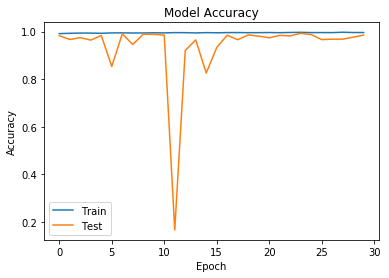

In [3]:
# read directory
import sys
import os
import pickle
import numpy as np
from keras.utils import to_categorical
from collections import Counter
from sklearn.model_selection import train_test_split
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from keras.models import Model
from keras import backend as k
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import model_from_json

model_name = 'resnet56v2_21_50'
input_dir = '/content/drive/My Drive/PUBLIC/PROJECT/OCR/STR/PKL_64v4/'
output_dir = '/content/drive/My Drive/PUBLIC/PROJECT/OCR/STR/COLAB_OUTPUT_5/'
json_dir = '/content/drive/My Drive/PUBLIC/PROJECT/OCR/STR/COLAB_OUTPUT_5/resnet56v2_11_20/model.json'
weights_dir = '/content/drive/My Drive/PUBLIC/PROJECT/OCR/STR/COLAB_OUTPUT_5/resnet56v2_11_20/weights.h5'

if os.path.isdir(output_dir):
    pass
else:
    os.mkdir(output_dir)

if os.path.isdir(output_dir + str(model_name)):
    pass
else:
    os.mkdir(output_dir + str(model_name))
   
filenames = os.listdir(input_dir)
for filename in filenames:
    if 'image' in filename:
        print('loading %s' % filename)
        with open(input_dir + filename, 'rb') as f:
            X = pickle.load(f)
        print('loaded!')
    else:
        print('loading %s' % filename)
        with open(input_dir + filename, 'rb') as f:
            Y = pickle.load(f)
        print('loaded!')

X = np.array(X)
X = X[:, :, :, np.newaxis]
input_shape = X.shape[1:]
Y = np.array(Y)
num_classes = len(Counter(Y))
Y = to_categorical(Y, num_classes)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=37, shuffle=True)
print('# of images: %d' % len(X))
print('Shape of images:', X.shape[1:])
print('# of train set: %d' % len(X_train), '# of test set: %d' % len(X_test))
del X, Y

# Define Model
version = 2
n = 6
depth = n * 9 + 2
batch_size = 128
epochs = 50 # 200
model_type = 'ResNet%dv%d' % (depth, version)


def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


json_file = open(json_dir, 'r')
json_model = json_file.read()
json_file.close()
model = model_from_json(json_model)
model.load_weights(weights_dir)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr_schedule(0)), metrics=['accuracy'])
print(model_type)
checkpoint = ModelCheckpoint(filepath=output_dir + str(model_name) + '/checkpoint.{epoch:03d}.hg',
                             monitor='val_acc',
                             verbose=2,
                             save_best_only=True)
lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [checkpoint, lr_reducer, lr_scheduler]
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=callbacks, validation_split=0.2, initial_epoch=20)
eva = model.evaluate(X_test, Y_test, verbose=2)


def plot_loss(history, output_dir, model_name):
    plt.clf()
    plt_loss = plt
    plt_loss.plot(history.history['loss'])
    plt_loss.plot(history.history['val_loss'])
    plt_loss.title('Model Loss')
    plt_loss.xlabel('Epoch')
    plt_loss.ylabel('Loss')
    plt_loss.legend(['Train', 'Test'], loc=0)
    figure = output_dir + str(model_name) + '/loss.png'
    plt_loss.savefig(figure, dpi=1080)


def plot_acc(history, output_dir, model_name):
    plt.clf()
    plt_acc = plt
    plt_acc.plot(history.history['acc'])
    plt_acc.plot(history.history['val_acc'])
    plt_acc.title('Model Accuracy')
    plt_acc.xlabel('Epoch')
    plt_acc.ylabel('Accuracy')
    plt_acc.legend(['Train', 'Test'], loc=0)
    figure = output_dir + str(model_name) + '/accuracy.png'
    plt_acc.savefig(figure, dpi=1080)


def csv_fit(history, output_dir, model_name):
    train_data = pd.DataFrame(history.history)
    train_data.to_csv(output_dir + str(model_name) + '/csv_fit.csv')
    return None


def csv_eva(history, output_dir, model_name):
    test_data = pd.DataFrame(history)
    test_data = test_data.T
    if len(history) == 5:
        test_data_header = ['test_loss', 'test_acc', 'precision', 'recall', 'f1score']
    else:
        test_data_header = ['test_loss', 'test_acc']
    test_data.to_csv(output_dir + str(model_name) + '/csv_eva.csv', header=test_data_header)
    return None


print('Model: ', model_name, ', Loss: ', eva[0], ', Accuracy: ', eva[1])
plot_loss(history=fit, output_dir=output_dir, model_name=model_name)
plot_acc(history=fit, output_dir=output_dir, model_name=model_name)
csv_fit(history=fit, output_dir=output_dir, model_name=model_name)
csv_eva(history=eva, output_dir=output_dir, model_name=model_name)
model.save(output_dir + str(model_name) + '/model.h5')
model_json = model.to_json()
with open(output_dir + str(model_name) + '/model.json', 'w') as json_file:
    json_file.write(model_json)
    json_file.close()
model_yaml = model.to_yaml()
with open(output_dir + str(model_name) + '/model.yaml', 'w') as yaml_file:
    yaml_file.write(model_yaml)
    yaml_file.close()
model.save_weights(output_dir + str(model_name) + '/weights.h5')
print('Done!')


In [0]:
print('=====output=====')
!ls '/content/drive/My Drive/PUBLIC/PROJECT/OCR/STR/COLAB_OUTPUT_2/resnet56v2'